<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#баласировка-веса-классов" data-toc-modified-id="баласировка-веса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>баласировка веса классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Установление-порога" data-toc-modified-id="Установление-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Установление порога</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Визуализируем-соотношение-precision-и-recall.-PR-кривая" data-toc-modified-id="Визуализируем-соотношение-precision-и-recall.-PR-кривая-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Визуализируем соотношение precision и recall. PR-кривая</a></span></li><li><span><a href="#Построим-ROC-кривую-и-найдем-AUC-ROC" data-toc-modified-id="Построим-ROC-кривую-и-найдем-AUC-ROC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построим ROC-кривую и найдем AUC-ROC</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. Постараемся довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# игнорирование предупреждений о несоответствии версий
import warnings
warnings.filterwarnings('ignore')

# Библиотеки для работы таблицами и визуализации
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# импортируем механизм масштабирования
from sklearn.preprocessing import StandardScaler

# импортируем модели для обучения
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# импортируем инструменты для работы с моделями
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Библиотеки для работы с графиками
import seaborn as sns
import matplotlib.pyplot as plt

Прогноз ухода клиента относится к задачам классификации, поэтому для обучения используем следующие модели:
- Дерево решений
- Случайный лес
- Логистическая регрессия

In [2]:
data = pd.read_csv('~/bank-churn/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Данные содержат большой разброс значений, соответственно, подлежат масштабированию, также в них имеются нечисловые признаки, в связи с чем применим метод One Hot Encoding. Также пропыски в столбце Tenure скорее всего связаны с техническим недочетом так, как при наличии средств на балансе клиента нет данных о продолжительности сотрудничества клиента с банком, это важные данные, поэтому строки с пропусками уберем.

In [5]:
c = []
for i in data.columns.to_list():
    a = []
    for j in i:
        if j.isupper() == False or i.index(j) == 0:
            a.append(j.lower())
        elif j.isupper() == True:
            a.append('_')
            a.append(j.lower())
    c.append(''.join(a))
    
data.columns = c

data.head() 

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
# удалим пропуски
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


<AxesSubplot:>

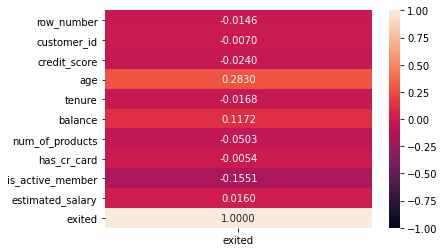

In [7]:
sns.heatmap(data.corr()[['exited']], vmax=1, vmin=-1, annot = True, fmt='.4f')

Присутствует средняя корреляция целевого признака с возрастом клиента, однако возраст - важный фактор. Чтобы он не воспринимался моделью как количественный признак, предлагаю разбить этот столбец на категории:
- 18 - 25 A
- 26 - 30 B
- 31 - 35 C
- 36 - 40 D
- 41 - 45 E
- 46 и выше F

In [8]:
# создадим столбец с категориями
data['age_c'] = None
data['age'] = data['age'].astype('int')

In [9]:
# заполним категории
age = [25, 30, 35, 40, 45, 46]
category = ['A', 'B', 'C', 'D', 'E', 'F']

for i in range(len(age)):
    if age[i] == 25:
        data.loc[data['age'] <= age[i], 'age_c'] = category[i]
    elif age[i] == 30:
        data.loc[(data['age'] <= age[i]) & (data['age'] > age[i-1]), 'age_c'] = category[i]
    elif age[i] == 35:
        data.loc[(data['age'] <= age[i]) & (data['age'] > age[i-1]), 'age_c'] = category[i]
    elif age[i] == 40:
        data.loc[(data['age'] <= age[i]) & (data['age'] > age[i-1]), 'age_c'] = category[i]
    elif age[i] == 45:
        data.loc[(data['age'] <= age[i]) & (data['age'] > age[i-1]), 'age_c'] = category[i]
    elif age[i] == 46:
        data.loc[(data['age'] >= age[i]), 'age_c'] = category[i]
data['age_c'].value_counts()

D    2030
C    1979
F    1939
E    1340
B    1233
A     570
Name: age_c, dtype: int64

Также разобьем на категории столбец со сроком сотрудничества.
- 0 - 2 D
- 3 - 5 C
- 6 - 8 B
- 9 и более A

In [10]:
# создадим столбец с категориями
data['tenure_с'] = None
data['tenure'] = data['tenure'].astype('int')

In [11]:
# заполним категории
tenure = [2, 5, 8, 9]
category = ['D', 'C', 'B', 'A']

for i in range(len(tenure)):
    if tenure[i] == 2:
        data.loc[data['tenure'] <= tenure[i], 'tenure_с'] = category[i]
    elif tenure[i] == 5:
        data.loc[(data['tenure'] <= tenure[i]) & (data['tenure'] > tenure[i-1]), 'tenure_с'] = category[i]
    elif tenure[i] == 8:
        data.loc[(data['tenure'] <= tenure[i]) & (data['tenure'] > tenure[i-1]), 'tenure_с'] = category[i]
    elif tenure[i] == 9:
        data.loc[(data['tenure'] >= tenure[i]), 'tenure_с'] = category[i]

data['tenure_с'].value_counts()

C    2740
B    2739
D    2284
A    1328
Name: tenure_с, dtype: int64

In [12]:
# уберем лишние столбцы
data = data.drop(['age', 'tenure', 'row_number', 'customer_id', 'surname'], axis=1)
data = data.reset_index(drop=True)

In [13]:
data.head()

,credit_score,geography,gender,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,age_c,tenure_с
0,619,France,Female,0.00,1,1,1,101348.88,1,E,D
1,608,Spain,Female,83807.86,1,0,1,112542.58,0,E,D
2,502,France,Female,159660.80,3,1,0,113931.57,1,E,B
3,699,France,Female,0.00,2,0,0,93826.63,0,D,D
4,850,Spain,Female,125510.82,1,1,1,79084.10,0,E,D


Проведем one hot encoding и масштабирование признаков

In [14]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [15]:
# разобьем датасет на выборки в пропорции 3:1:1
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

# выделим обучающую выборку в размере 60% датасета
features_train, features_val_test, target_train, target_val_test = train_test_split(features, target, test_size=0.4,
                                                                             random_state=12345)
# Оставшиеся данные разделим на валидационную и тестовую выборку
features_valid, features_test, target_valid, target_test = train_test_split(features_val_test, target_val_test,
                                                                              test_size=0.5, random_state=12345)

In [16]:
numeric = ['credit_score', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [17]:
features_train.head()

,credit_score,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,age_c_B,age_c_C,age_c_D,age_c_E,age_c_F,tenure_с_B,tenure_с_C,tenure_с_D
8483,0.809075,0.554904,1,1,0,0.019508,0,0,0,1,0,0,0,0,0,0,1
3431,-1.152518,0.480609,1,0,0,0.056167,0,0,1,1,0,0,0,0,1,0,0
6770,-0.398853,-1.237830,1,1,1,0.848738,0,0,1,0,0,1,0,0,0,0,0
1350,-0.749875,-1.237830,2,1,1,-0.894953,0,0,1,0,0,1,0,0,1,0,0
4047,-1.028628,-1.237830,2,0,1,-1.284516,0,0,1,0,1,0,0,0,0,1,0


Полученную таблицу допустимо исмользовать для дальнейших исследований моделей.

## Исследование задачи

Определим соотношение классов в тренировочном датасете

In [18]:
target_train.value_counts()

0    4328
1    1126
Name: exited, dtype: int64

Опробуем метод прогноза по константе, дисбаланс сильно влияет на результаты, константаная модель работает в 79% случаев.

In [19]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent', random_state=12345)
clf.fit(features_train, target_train)
clf.score(features_train, target_train)

0.7935460212687936

В целях эксперимента обучим модель, возьмем для этого модель случайного леса.

In [30]:
# Датафрейм в размере равном гиперпараметрам depth и n_estimators
forest_unbalanced = pd.DataFrame(index=range(1, 11), columns=range(100, 501, 20))

In [31]:
%%time
# С помощью цикла определим лучшие значения гиперпараметров модели
best_depth = 0
best_est = 0
best_accuracy = 0
best_model_unbalanced = None
for depth in range(1, 11):
    for est in range(100, 501, 20):
        model_unbalanced = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model_unbalanced.fit(features_train, target_train)
        prediction_unbalanced = model_unbalanced.predict(features_valid)
        accuracy_unbalanced = accuracy_score(target_valid, prediction_unbalanced)
        forest_unbalanced.loc[depth, est] = accuracy_unbalanced
        if accuracy_unbalanced > best_accuracy:
            best_accuracy = accuracy_unbalanced
            best_est = est
            best_depth = depth
            best_model_unbalanced = model_unbalanced
print(f'''Лучшее соотношение гиперпараметров:
      depth - {best_depth}
      n_estimators - {best_est}
      accuracy равен: {best_accuracy}''')

Лучшее соотношение гиперпараметров:
      depth - 9
      n_estimators - 200
      accuracy равен: 0.8641364136413642
CPU times: user 3min 19s, sys: 970 ms, total: 3min 20s
Wall time: 3min 20s


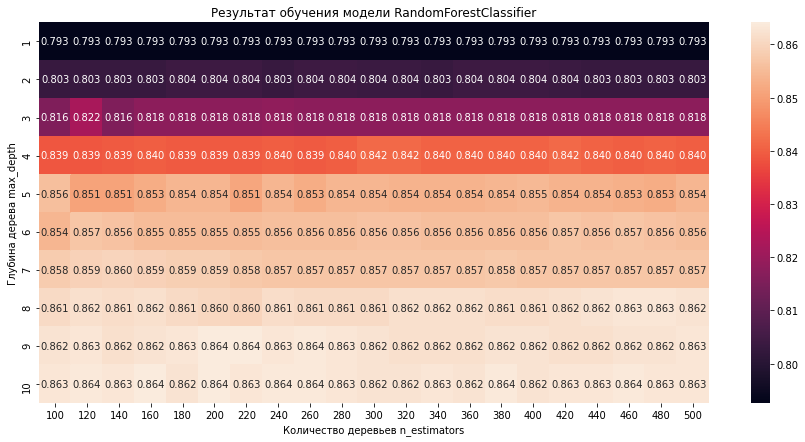

In [32]:
# Строим heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(forest_unbalanced.astype('float'), annot = True, fmt='.3f')
plt.xlabel('Количество деревьев n_estimators')
plt.ylabel('Глубина дерева max_depth')
plt.title('Результат обучения модели RandomForestClassifier')
plt.show()

Посмотрим метрики

In [33]:
from sklearn.metrics import classification_report

report = classification_report(target_valid, prediction_unbalanced, target_names=['Остаётся', 'Уходит'])
print(report)

              precision    recall  f1-score   support

    Остаётся       0.87      0.98      0.92      1441
      Уходит       0.82      0.43      0.57       377

    accuracy                           0.86      1818
   macro avg       0.85      0.70      0.74      1818
weighted avg       0.86      0.86      0.85      1818



In [34]:
# Взглянем подробнее
f1_score(target_valid, prediction_unbalanced)

0.5669565217391304

Полнота у класса 1 меньше 50%. В большинстве случаев она угадывает, но при этом охватывает всего 43% класса. В дальнейшем рекомендуется изменить размер порога вхождения в класс 1 с целью сбалансировать соотношение точности и полноты.

In [25]:
#sns.heatmap(c_m, annot = True, fmt='.0f')
#plt.xlabel('Количество деревьев n_estimators')
#plt.ylabel('Глубина дерева max_depth')
#plt.title('Результат обучения модели RandomForestClassifier')
#plt.show()

<Figure size 504x504 with 0 Axes>

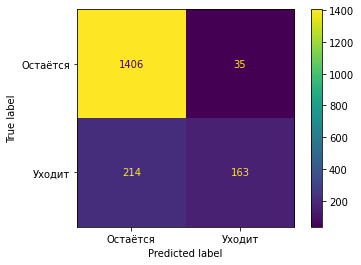

In [35]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c_m = confusion_matrix(target_valid, prediction_unbalanced, labels=model_unbalanced.classes_)
plt.figure(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=c_m,
                               display_labels=['Остаётся', 'Уходит'])
disp.plot()
plt.show()


На иллюстрации видно, что полнота предсказания составляет всего 43% Попробуем в дальнейшем подобрать показатель Treshhold для нахождения баланса.

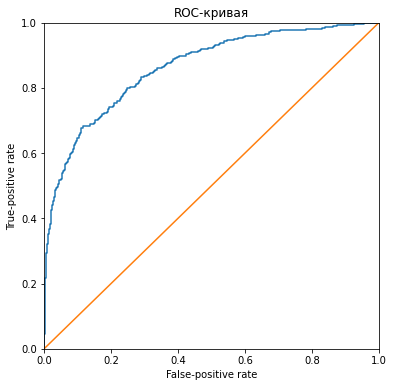

AUC-ROC равен 0.8621352324958536


In [38]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
# Смотрим отличие модели от рандомного предсказания

probabilities_valid = best_model_unbalanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6, 6))

plt.step(fpr, tpr, where='post')
plt.plot([0, 1], [0, 1])

plt.xlabel('False-positive rate')
plt.ylabel('True-positive rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show() 
print('AUC-ROC равен', roc_auc_score(target_valid, probabilities_one_valid))

## Борьба с дисбалансом

Для борьбы с дисбалансом применим следующие методики:
- сбалансируем классы аргументом class_weight
- upsampling 
- downsampling 
- установление порога классификации

### баласировка веса классов

In [45]:
%%time
# С помощью цикла определим лучшие значения гиперпараметров модели
model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200,
                              class_weight='balanced')
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
print(accuracy_score(target_valid, prediction))
print(f1_score(target_valid, prediction))

0.8360836083608361
0.6265664160401003
CPU times: user 967 ms, sys: 12 ms, total: 978 ms
Wall time: 979 ms


При балансировке классов accuracy снизился на 3%, казалось бы, плохой результат, но посмотрим другие метрики.

In [46]:
report = classification_report(target_valid, prediction, target_names=['Остаётся', 'Уходит'])
print(report)

              precision    recall  f1-score   support

    Остаётся       0.91      0.88      0.89      1441
      Уходит       0.59      0.66      0.63       377

    accuracy                           0.84      1818
   macro avg       0.75      0.77      0.76      1818
weighted avg       0.84      0.84      0.84      1818



<Figure size 504x504 with 0 Axes>

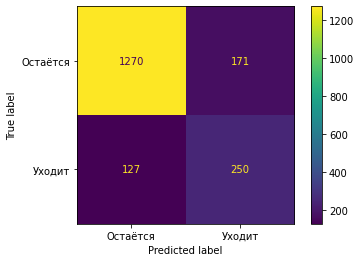

In [47]:
cm = confusion_matrix(target_valid, prediction, labels=model.classes_)
plt.figure(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Остаётся', 'Уходит'])
disp.plot()
plt.show()

Точность модели снизилась, однако полнота возросла, теперь большую часть уходящих мдель в состоянии предстказать, не исключая ошибок. F1-мера возросла на 6% по классу 1, при падении в классе 0 всего на 3%

### Upsampling

In [48]:
# напишем функцию для апсемплинга
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [49]:
from sklearn.utils import shuffle
# путем перебора находим лучший множитель
best_f1 = 0
best_sample = 0
for i in range(2, 11, 2):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200)
    model.fit(features_upsampled, target_upsampled)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1 = f1
        best_sample = i
print(f'лучший множитель: {best_sample}\nлучший f1 {best_f1}')

лучший множитель: 4, 
 лучший f1 0.6165919282511211


Сам по себе оверсемплинг поднял показатель F1 на 5% в сравнении с несбалансированной выборкой, самый эффективный множитель 4. Ради интереса сделаем уравновесим классы в самой модели:

In [50]:
best_f1 = 0
best_sample = 0
# аналогично предыдущему, но с параметром class_weight
for i in range(2, 11, 2):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200,
                              class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1 = f1
        best_sample = i
print(f'лучший множитель: {best_sample},\n лучший f1 {best_f1}')

лучший множитель: 2, 
 лучший f1 0.6338028169014085


Путем комбинации двух методов мерика F1 выросла на 6% в сравнении с несбалансированными классами и на 1% в сравнении с просто сбалансированной моделью.

### Downsampling

In [53]:
# функция для сокращения большего класа и смешивания данных
def downsample(features, target, fraction):
    features_ones = features[target == 1]
    features_zeros = features[target == 0]
    target_ones = target[target == 1]
    target_zeros = target[target == 0]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [56]:
import numpy as np
# ищем множитель
best_f1 = 0
best_frac = 0
for frac in np.arange(0.1, 0.9, 0.1):
    features_downsampled, target_downsampled = downsample(features_train, target_train, frac)
    model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200)
    model.fit(features_downsampled, target_downsampled)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1 = f1
        best_frac = frac
print(f'лучший множитель: {best_frac}\nлучший f1 {best_f1}')

лучший множитель: 0.4,
 лучший f1 0.6355382619974059


Downsampling улучшил F1 на 2% в сравнении с Upsampling и его комбинацией с аргументом class_weight. Проверим комбинацию и на нем.

In [58]:
import numpy as np
# то же самое с балансом
best_f1 = 0
best_frac = 0
for frac in np.arange(0.1, 0.9, 0.1):
    features_downsampled, target_downsampled = downsample(features_train, target_train, frac)
    model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200,
                              class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    prediction = model.predict(features_valid)
    f1 = f1_score(target_valid, prediction)
    if f1 > best_f1:
        best_f1 = f1
        best_frac = frac
print(f'лучший множитель: {best_frac}\nлучший f1 {best_f1}')

лучший множитель: 0.8,
 лучший f1 0.6310679611650487


Изменение аргумента class_weight не привело к росту F1-меры, простой downsampling показал себя эффективнее.

### Установление порога

In [62]:
from sklearn.metrics import precision_score, recall_score
# Снова обучим два варианата class_weight
model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
best_f1 = 0
for threshold in np.arange(0, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_treshold = threshold
    print("Порог = {:.2f} | Точность = {:.4f}, Полнота = {:.4f}, F1 = {:.4f}".format(
        threshold, precision, recall, f1))
print(f'лучший порог: {best_frac}\nлучший f1 {best_f1}')

Порог = 0.00 | Точность = 0.2074, Полнота = 1.0000, F1 = 0.3435
Порог = 0.02 | Точность = 0.2083, Полнота = 1.0000, F1 = 0.3448
Порог = 0.04 | Точность = 0.2248, Полнота = 0.9920, F1 = 0.3665
Порог = 0.06 | Точность = 0.2497, Полнота = 0.9788, F1 = 0.3978
Порог = 0.08 | Точность = 0.2788, Полнота = 0.9629, F1 = 0.4324
Порог = 0.10 | Точность = 0.3152, Полнота = 0.9390, F1 = 0.4720
Порог = 0.12 | Точность = 0.3468, Полнота = 0.9098, F1 = 0.5022
Порог = 0.14 | Точность = 0.3758, Полнота = 0.8833, F1 = 0.5273
Порог = 0.16 | Точность = 0.4030, Полнота = 0.8541, F1 = 0.5476
Порог = 0.18 | Точность = 0.4324, Полнота = 0.8143, F1 = 0.5649
Порог = 0.20 | Точность = 0.4589, Полнота = 0.7851, F1 = 0.5793
Порог = 0.22 | Точность = 0.4878, Полнота = 0.7454, F1 = 0.5897
Порог = 0.24 | Точность = 0.5224, Полнота = 0.7109, F1 = 0.6022
Порог = 0.26 | Точность = 0.5520, Полнота = 0.6897, F1 = 0.6132
Порог = 0.28 | Точность = 0.6111, Полнота = 0.6711, F1 = 0.6397
Порог = 0.30 | Точность = 0.6330, Полнот

In [63]:
model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_treshold = 0
best_f1 = 0
for threshold in np.arange(0, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_treshold = threshold
    print("Порог = {:.2f} | Точность = {:.4f}, Полнота = {:.4f}, F1 = {:.4f}".format(
        threshold, precision, recall, f1))
print(f'лучший порог: {best_frac}\nлучший f1 {best_f1}')

Порог = 0.00 | Точность = 0.2074, Полнота = 1.0000, F1 = 0.3435
Порог = 0.02 | Точность = 0.2074, Полнота = 1.0000, F1 = 0.3435
Порог = 0.04 | Точность = 0.2075, Полнота = 1.0000, F1 = 0.3437
Порог = 0.06 | Точность = 0.2104, Полнота = 0.9973, F1 = 0.3475
Порог = 0.08 | Точность = 0.2182, Полнота = 0.9947, F1 = 0.3578
Порог = 0.10 | Точность = 0.2279, Полнота = 0.9867, F1 = 0.3703
Порог = 0.12 | Точность = 0.2347, Полнота = 0.9841, F1 = 0.3790
Порог = 0.14 | Точность = 0.2429, Полнота = 0.9814, F1 = 0.3895
Порог = 0.16 | Точность = 0.2588, Полнота = 0.9788, F1 = 0.4093
Порог = 0.18 | Точность = 0.2696, Полнота = 0.9682, F1 = 0.4217
Порог = 0.20 | Точность = 0.2833, Полнота = 0.9523, F1 = 0.4367
Порог = 0.22 | Точность = 0.2996, Полнота = 0.9416, F1 = 0.4545
Порог = 0.24 | Точность = 0.3146, Полнота = 0.9337, F1 = 0.4706
Порог = 0.26 | Точность = 0.3279, Полнота = 0.9125, F1 = 0.4825
Порог = 0.28 | Точность = 0.3432, Полнота = 0.8939, F1 = 0.4960
Порог = 0.30 | Точность = 0.3568, Полнот

В сочетании с class_weight изменение порога вызвало рост полноты и падение точности. 

Данное сочетание отбрасываем.

### Выбор лучшей модели

Для формирования лучшей модели попробуем объединить метод даун-семплинга и изменения порога.

In [91]:
%%time
best_f1 = 0
best_frac = 0
best_treshold = 0
best_f1 = 0
best_class_weight = None
best_model = None
best_predicted_valid = None
# перебираем class_weight и множители
for class_weight in ['balanced', None]:
    for frac in np.arange(0.1, 0.9, 0.1):
        features_downsampled, target_downsampled = downsample(features_train, target_train, frac)
        model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200,
                                      class_weight=class_weight)
        model.fit(features_downsampled, target_downsampled)
            
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        # перебираем порог    
        for threshold in np.arange(0, 0.4, 0.02):
            predicted_valid = probabilities_one_valid > threshold 
            precision = precision_score(target_valid, predicted_valid)
            recall = recall_score(target_valid, predicted_valid)
            f1 = f1_score(target_valid, predicted_valid)
        
            if f1 > best_f1:
                best_f1 = f1
                best_frac = frac
                best_treshold = threshold
                best_class_weight =class_weight
                best_model = model
                best_predicted_valid = predicted_valid
        
print(f'лучший множитель: {best_frac}\nлучший f1 {best_f1}\nлучший treshold {best_treshold} \
            \nлучший best_class_weight {class_weight}\n')

лучший множитель: 0.7000000000000001
лучший f1 0.641025641025641
лучший treshold 0.36             
лучший best_class_weight None

CPU times: user 12 s, sys: 88 ms, total: 12.1 s
Wall time: 12.1 s


In [92]:
# посмотрим показатели лучшей модели
report = classification_report(target_valid, best_predicted_valid, target_names=['Остаётся', 'Уходит'])
print(report)

              precision    recall  f1-score   support

    Остаётся       0.91      0.89      0.90      1441
      Уходит       0.62      0.66      0.64       377

    accuracy                           0.85      1818
   macro avg       0.77      0.78      0.77      1818
weighted avg       0.85      0.85      0.85      1818



<Figure size 504x504 with 0 Axes>

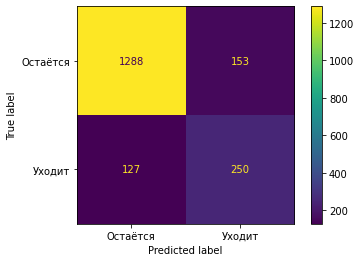

In [93]:
# посмотрим на соотношение ошибок
cm_model = confusion_matrix(target_valid, best_predicted_valid, labels=model.classes_)
plt.figure(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_model,
                               display_labels=['Остаётся', 'Уходит'])
disp.plot()
plt.show()

В сравнении с обычной балансировкой веса классов картина в классе "Уходит" или 1 осталась прежней, однако при этом снизилась доля ошибки в классе "Остаётся" или 0.
Комбинация двух методов даунсемплинга и регулирование порога дало наилучший результат на валидационной выборке, возьмем эту модель для окончательного тестирования.

## Тестирование модели

Протестируем модель на тестовых данных

In [95]:
# определим вероятность прогноза класса 1
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
# установим лучший порог           
predicted_test = probabilities_one_test > best_treshold
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
f1 = f1_score(target_test, predicted_test)
                
print(f'f1 {f1}\nrecall {recall} \
            \nprecision {precision}\n')
print(classification_report(target_test, predicted_test, target_names=['Остаётся', 'Уходит']))

f1 0.6013605442176871
recall 0.6296296296296297             
precision 0.5755208333333334

              precision    recall  f1-score   support

    Остаётся       0.91      0.89      0.90      1468
      Уходит       0.58      0.63      0.60       351

    accuracy                           0.84      1819
   macro avg       0.74      0.76      0.75      1819
weighted avg       0.84      0.84      0.84      1819



Для эксперимента, обучим модель с найденными параментрами на более объемных данных, путем объединения обучающей и валидационной выборки.

In [97]:
# объединим выборки
features_train_valid = pd.concat([features_train] + [features_valid])
target_train_valid = pd.concat([target_train] + [target_valid])

In [98]:
%%time
# даунсемплинг
features_downsampled, target_downsampled = downsample(features_train_valid, target_train_valid, best_frac)
# обучаем модель аналогично лучшей
experimental_model = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=200)
experimental_model.fit(features_downsampled, target_downsampled)

probabilities_test_exp = model.predict_proba(features_test)
probabilities_one_test_exp = probabilities_test_exp[:, 1]

predicted_test_exp = probabilities_one_test_exp > best_treshold
precision_test_exp = precision_score(target_test, predicted_test_exp)
recall_test_exp = recall_score(target_test, predicted_test_exp)
f1_test_exp = f1_score(target_test, predicted_test_exp)

print(f'f1 {f1_test_exp}\nrecall {recall_test_exp} \
            \nprecision {precision_test_exp}\n')
print(classification_report(target_test, predicted_test_exp, target_names=['Остаётся', 'Уходит']))


f1 0.6002928257686676
recall 0.584045584045584             
precision 0.6174698795180723

              precision    recall  f1-score   support

    Остаётся       0.90      0.91      0.91      1468
      Уходит       0.62      0.58      0.60       351

    accuracy                           0.85      1819
   macro avg       0.76      0.75      0.75      1819
weighted avg       0.85      0.85      0.85      1819

CPU times: user 963 ms, sys: 12 ms, total: 975 ms
Wall time: 973 ms


Качество модели незначительно снизилось, поэтому оставляем прежнюю модель с F1 = 0.6013

### Визуализируем соотношение precision и recall. PR-кривая

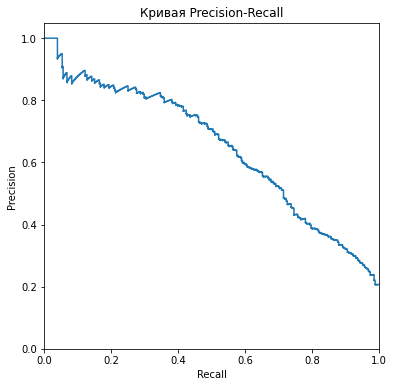

In [105]:
from sklearn.metrics import precision_recall_curve
# Смотрим взаимозависимость показателей
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_one_test)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Не самое плохое соотношение точности и полноты

### Построим ROC-кривую и найдем AUC-ROC

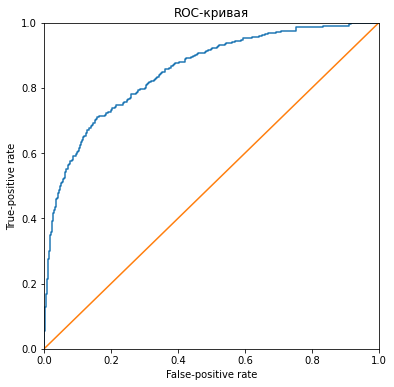

AUC-ROC равен 0.8508096757415559


In [135]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
# Смотрим отличие модели от рандомного предсказания
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(6, 6))

plt.step(fpr, tpr, where='post')
plt.plot([0, 1], [0, 1])

plt.xlabel('False-positive rate')
plt.ylabel('True-positive rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show() 
print('AUC-ROC равен', roc_auc_score(target_test, probabilities_one_test))

Модель отличается от случайной на 35%, что делает её применение оправданным.